In [1]:
! rm -rf  PyFed
! git clone https://github.com/yj1990/PyFed

Cloning into 'PyFed'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 134 (delta 75), reused 82 (delta 34), pack-reused 0
Receiving objects: 100% (134/134), 2.16 MiB | 8.44 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [2]:
! pip install quandl fredapi

In [3]:
import os
ROOT_DIR = "."
try:
    os.chdir(os.path.join(ROOT_DIR,'PyFed'))
except:
    pass

import fedapi.interest_rate as ir
import fedapi.money_stock as ms
import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
def ts_plot(df,date_range,keys,names,title):

    fig = go.Figure()
    
    for k,n in zip(keys,names):
        
        fig.add_trace(
            go.Scatter(
                x=df.index, 
                y=df[k], 
                name=n
            )
        )

    fig.update_layout(
        title_text=title,
        xaxis_rangeslider_visible=True
    )
    
    fig.show()

In [5]:
get_ir = ir.vendor()

In [6]:
fed_repo_rate,fed_repo_vol = get_ir.fed_repo('both')

In [7]:
# Plot volume of repo operations
df = fed_repo_vol['RP']
ts_plot(df, df.index, df.columns, df.columns, 'Volume for Repo operations')

In [9]:
# Plot volumes of RRP operations
df = fed_repo_vol['RRP']
ts_plot(df, df.index, df.columns, df.columns, 'Volume for RRP operations')

In [10]:
# load gcf repo rates
gcf = get_ir.dtcc_gcf()

In [11]:
df = gcf.copy()
ts_plot(df, df.index, df.columns, df.columns, 'GCF Repo Index')

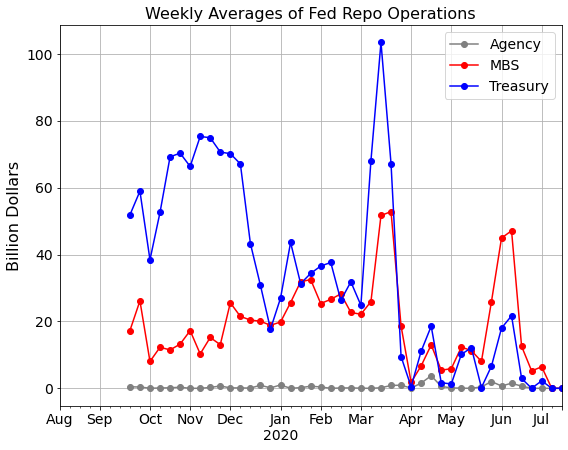

In [50]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

ax = fed_repo_vol['RP']['2019-8':].resample('W').mean().plot(marker='o',color = ['Gray','Red','Blue'],grid = True, figsize = (9,7))
ax.legend(['Agency','MBS','Treasury'])
ax.set_title('Weekly Averages of Fed Repo Operations', fontsize=16)
ax.set_ylabel('Billion Dollars',fontsize=16)
ax.set_xlabel(None)
plt.savefig('fedrepo.png')